<a href="https://colab.research.google.com/github/sitiannisashr/Praktikum-2/blob/master/Covid19(FIX).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import matplotlib.image as plt_image
plt.style.use('seaborn')

from tensorflow.keras.preprocessing import image as keras_image
import numpy as np

In [ ]:
training_dir = "/content/drive/MyDrive/Dataset/Train"
validation_dir = "/content/drive/MyDrive/Dataset/Val"
testing_dir = "/content/drive/MyDrive/Dataset/Test"

In [ ]:
# Augmentasi Gambar
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.1,
    rescale=1/255
)

valid_datagen = ImageDataGenerator(
    rescale=1/255
)


In [ ]:
bs = 32         # Batch_Size
img_size = 128  # Image_Size

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(img_size, img_size),
    batch_size=bs,
    class_mode='binary'
)

validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=bs,
    class_mode='binary'
)


Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


In [ ]:
# Model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='RMSProp',
    metrics=['accuracy']
)
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 128)     

In [ ]:
#Training Model
epochs = 50
history=model.fit(train_generator,
                  steps_per_epoch=int(3648/32),
                  epochs=epochs,
                  validation_data=validation_generator,
                  validation_steps=int(455/32),
                  verbose=1
                  )

Epoch 1/50
114/114 [==============================] - 285s 2s/step - loss: 0.4936 - accuracy: 0.8292 - val_loss: 0.2567 - val_accuracy: 0.9196
Epoch 2/50
114/114 [==============================] - 279s 2s/step - loss: 0.2242 - accuracy: 0.9193 - val_loss: 0.1607 - val_accuracy: 0.9531
Epoch 3/50
114/114 [==============================] - 269s 2s/step - loss: 0.1553 - accuracy: 0.9459 - val_loss: 0.2732 - val_accuracy: 0.9397
Epoch 4/50
114/114 [==============================] - 272s 2s/step - loss: 0.1180 - accuracy: 0.9615 - val_loss: 0.1937 - val_accuracy: 0.9509
Epoch 5/50
114/114 [==============================] - 270s 2s/step - loss: 0.1008 - accuracy: 0.9690 - val_loss: 0.1903 - val_accuracy: 0.9665
Epoch 6/50
114/114 [==============================] - 264s 2s/step - loss: 0.1038 - accuracy: 0.9643 - val_loss: 0.1043 - val_accuracy: 0.9821
Epoch 7/50
114/114 [==============================] - 274s 2s/step - loss: 0.0783 - accuracy: 0.9750 - val_loss: 0.1408 - val_accuracy: 0.9844

In [ ]:
def plot(hist):
  history = hist.history
  history['epoch'] = hist.epoch

  plt.figure(figsize=(12, 5))

  plt.subplot(121)
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.plot(history['epoch'], history['loss'], label='Loss')
  plt.plot(history['epoch'], history['val_loss'], label='Val Loss', color='orange')
  plt.legend()

  plt.subplot(122)
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.plot(history['epoch'], history['accuracy'], label='Acc')
  plt.plot(history['epoch'], history['val_accuracy'], label='Val Acc', color='orange')
  plt.legend()

  return plt.show()

In [ ]:
plot(history)

In [ ]:
#Testing

classes = ["covid","normal"]

def test(model, width):
  test_images_paths = os.listdir('/content/drive/MyDrive/Dataset/testing')
  for path in test_images_paths:
    image_path = os.path.join('/content/drive/MyDrive/Dataset/testing', path)

    image = keras_image.load_img(image_path,
                                 target_size=(width, width))
    x = keras_image.img_to_array(image)
    x = np.expand_dims(x, axis=0)

    test_image = np.vstack([x])
    result = model.predict(test_image, batch_size=32)
    print(result)

    print(image_path)
    print(classes[(int(result[0]))])

    preview = plt_image.imread(image_path)
    plt.imshow(preview)
    plt.show()
  return print('Prediction Done')

In [ ]:
test(model,128)

In [ ]:
!mkdir '/content/drive/MyDrive/model/baseline'
MODEL_PATH = '/content/drive/MyDrive/model/baseline'
tf.saved_model.save(model, os.path.join(MODEL_PATH, 'saved_model'))

mkdir: cannot create directory ‘/content/drive/MyDrive/model/baseline’: No such file or directory


In [ ]:
tf.keras.models.save_model(model, os.path.join(MODEL_PATH, 'base_model7.h5'))

# TESTING

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
from tensorflow import keras

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/model/baseline/base_model3.h5')

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/Dataset/testing1')))

2


In [ ]:
import os
from tensorflow import keras

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import matplotlib.image as plt_image
plt.style.use('seaborn')

from tensorflow.keras.preprocessing import image as keras_image
import numpy as np

In [ ]:
#Testing

classes = ["covid","normal"]

def test(model, width):
  test_images_paths = os.listdir('/content/drive/MyDrive/Dataset/testing')
  for path in test_images_paths:
    image_path = os.path.join('/content/drive/MyDrive/Dataset/testing', path)

    image = keras_image.load_img(image_path,
                                 target_size=(width, width))
    x = keras_image.img_to_array(image)
    x = np.expand_dims(x, axis=0)

    test_image = np.vstack([x])
    result = model.predict(test_image, batch_size=32)
    print(result)

    print(image_path)
    print(classes[(int(result[0]))])

    preview = plt_image.imread(image_path)
    plt.imshow(preview)
    plt.show()
  return print('Prediction Done')

[[1.]]
/content/drive/MyDrive/Dataset/testing/pasien 2.png
normal


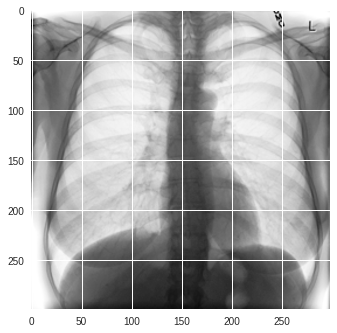

[[1.]]
/content/drive/MyDrive/Dataset/testing/pasien 13.jpg
normal


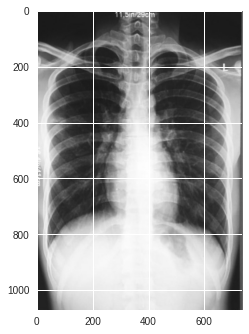

[[1.]]
/content/drive/MyDrive/Dataset/testing/pasien 4.jpg
normal


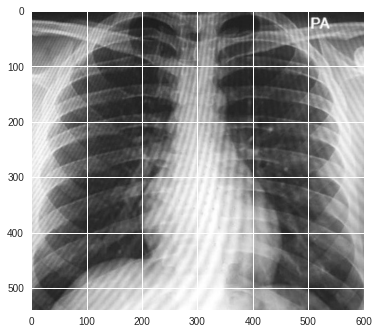

[[0.]]
/content/drive/MyDrive/Dataset/testing/pasien 10.jpg
covid


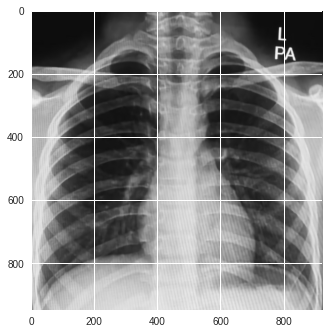

[[1.]]
/content/drive/MyDrive/Dataset/testing/pasien 8.jpg
normal


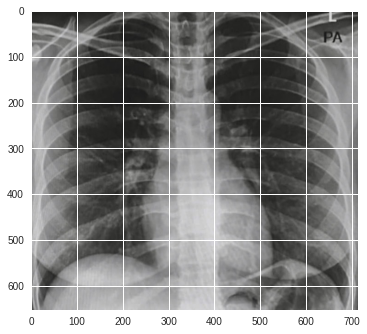

[[1.5394023e-27]]
/content/drive/MyDrive/Dataset/testing/pasien 7.jpg
covid


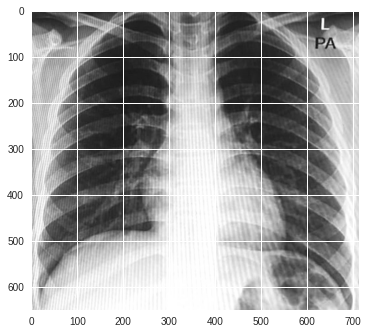

[[0.]]
/content/drive/MyDrive/Dataset/testing/pasien 9.jpg
covid


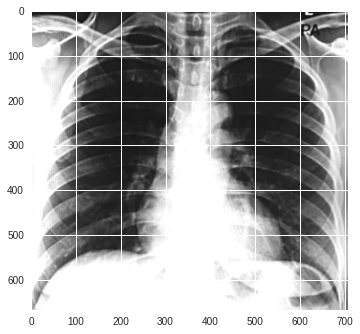

[[1.]]
/content/drive/MyDrive/Dataset/testing/pasien 1.png
normal


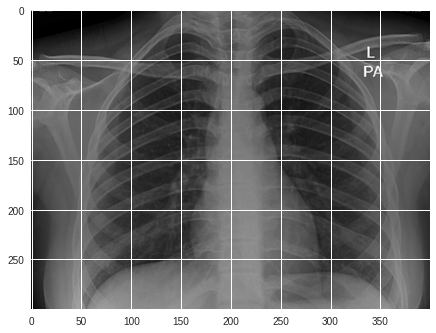

[[1.]]
/content/drive/MyDrive/Dataset/testing/pasien 11.png
normal


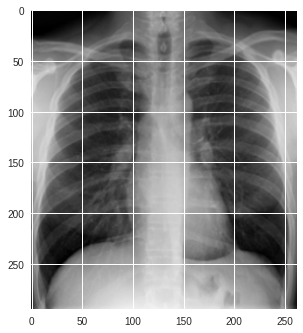

[[1.]]
/content/drive/MyDrive/Dataset/testing/pasien 5.png
normal


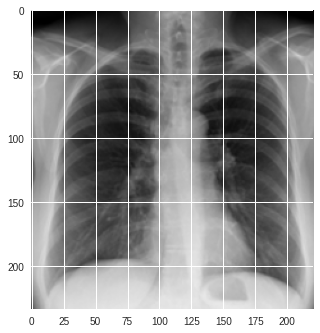

[[1.]]
/content/drive/MyDrive/Dataset/testing/pasien 3.png
normal


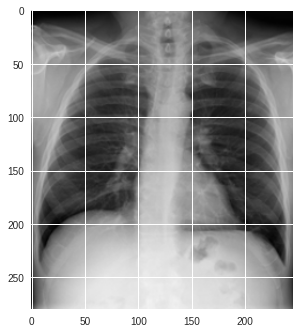

[[1.]]
/content/drive/MyDrive/Dataset/testing/pasien 6.png
normal


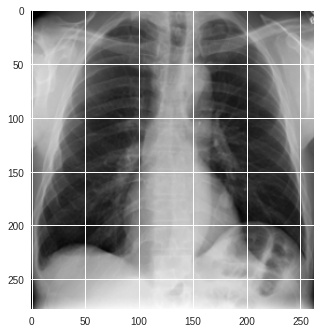

[[1.]]
/content/drive/MyDrive/Dataset/testing/pasien 12.png
normal


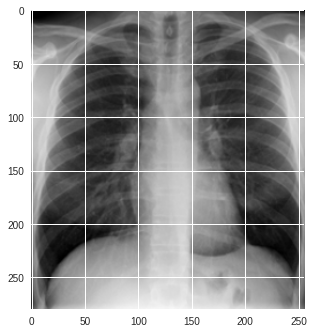

Prediction Done


In [ ]:
test(model, 128)

In [ ]:
classes = ["covid","normal"]
test_images_paths = os.listdir('/content/drive/MyDrive/Dataset/testing1')
label = []
pred = []
path_of_img = []
for path in test_images_paths:
  image_path = os.path.join('/content/drive/MyDrive/Dataset/testing1', path)
  for img in os.listdir(image_path):
    label.append(path)

    img_to_pred = '/content/drive/MyDrive/Dataset/testing1/' + path + '/' + img
    path_of_img.append(img_to_pred)

    image = keras_image.load_img(img_to_pred,
                                 target_size=(128, 128))
    x = keras_image.img_to_array(image)
    x = np.expand_dims(x, axis=0)

    test_image = np.vstack([x])
    result = model.predict(test_image, batch_size=32)

    pred.append(classes[(int(result[0]))])
    


In [ ]:
label

['covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal']

In [ ]:
pred

['covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'normal',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'normal',
 'covid',
 'normal',
 'normal',
 'normal',
 'covid',
 'covid',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal']

In [ ]:
import os
from tensorflow import keras

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
print(classification_report(label, pred))

              precision    recall  f1-score   support

       covid       0.91      0.91      0.91        22
      normal       0.89      0.89      0.89        18

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



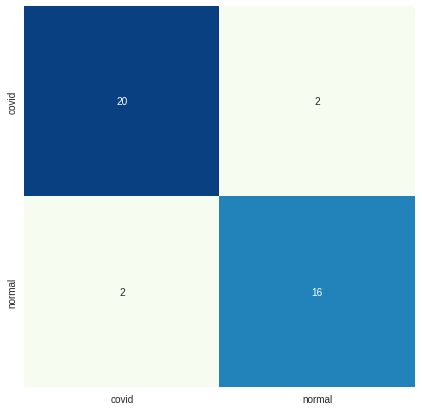

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(label, pred), xticklabels=classes, yticklabels=classes, annot=True, cmap='GnBu', cbar=False)

plt.show()